In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Americanexpress.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/10,40.810001,41.099998,40.389999,40.919998,33.300190,6894300
1,1/5/10,40.830002,41.230000,40.369999,40.830002,33.226929,10641200
2,1/6/10,41.230000,41.669998,41.169998,41.490002,33.764038,8399400
3,1/7/10,41.259998,42.240002,41.110001,41.980000,34.311646,8981700
4,1/8/10,41.759998,42.480000,41.400002,41.950001,34.287140,7907700
5,1/11/10,41.740002,41.959999,41.250000,41.470001,33.894825,7396000
6,1/12/10,41.270000,42.349998,41.250000,42.020000,34.344353,12657300
7,1/13/10,41.849998,42.240002,41.570000,42.150002,34.450615,10137200
8,1/14/10,42.040001,42.740002,42.020000,42.680000,34.883804,8238400
9,1/15/10,42.520000,42.840000,42.020000,42.389999,34.646763,13629000


<AxesSubplot:xlabel='Date'>

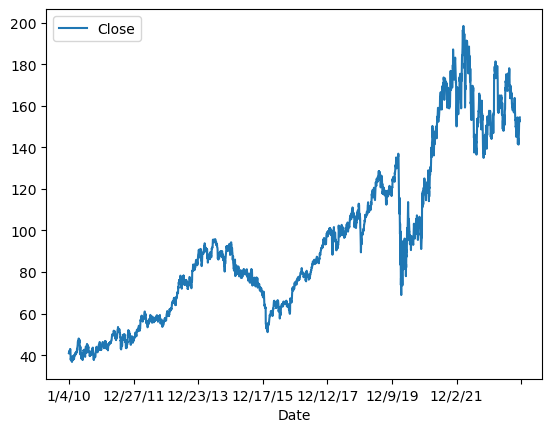

In [3]:
#Looking at the chart of AXP stock history over the past five years
df.plot.line(x= "Date", y="Close", use_index=True)


In [4]:
# check for missing values 
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
# Feature selection (I will use 'Close' price as a feature)
features = df[['Close']]
features

,Close
0,40.919998
1,40.830002
2,41.490002
3,41.980000
4,41.950001
...,...
3484,152.990005
3485,152.979996
3486,153.009995
3487,152.369995


In [6]:
# First I will create a column called "Tomorrow" which will be the same price as close the day before.
# We have Nan because there is no other other close price.

In [7]:
df["Tomorrow"] = df["Close"].shift(-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow
0,1/4/10,40.810001,41.099998,40.389999,40.919998,33.300190,6894300,40.830002
1,1/5/10,40.830002,41.230000,40.369999,40.830002,33.226929,10641200,41.490002
2,1/6/10,41.230000,41.669998,41.169998,41.490002,33.764038,8399400,41.980000
3,1/7/10,41.259998,42.240002,41.110001,41.980000,34.311646,8981700,41.950001
4,1/8/10,41.759998,42.480000,41.400002,41.950001,34.287140,7907700,41.470001
...,...,...,...,...,...,...,...,...
3484,11/6/23,152.600006,153.070007,151.509995,152.990005,152.990005,2490000,152.979996
3485,11/7/23,152.970001,153.789993,152.350006,152.979996,152.979996,1583300,153.009995
3486,11/8/23,152.970001,153.800003,152.429993,153.009995,153.009995,1804500,152.369995
3487,11/9/23,153.679993,154.160004,152.050003,152.369995,152.369995,2052900,154.380005


In [8]:
# Target variable I want to predict. (That will help me with the Machine Learning)
# Every time that we see 1, it means that tomorrow price went up compare to the previous day
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,1/4/10,40.810001,41.099998,40.389999,40.919998,33.300190,6894300,40.830002,0
1,1/5/10,40.830002,41.230000,40.369999,40.830002,33.226929,10641200,41.490002,1
2,1/6/10,41.230000,41.669998,41.169998,41.490002,33.764038,8399400,41.980000,1
3,1/7/10,41.259998,42.240002,41.110001,41.980000,34.311646,8981700,41.950001,0
4,1/8/10,41.759998,42.480000,41.400002,41.950001,34.287140,7907700,41.470001,0
...,...,...,...,...,...,...,...,...,...
3484,11/6/23,152.600006,153.070007,151.509995,152.990005,152.990005,2490000,152.979996,0
3485,11/7/23,152.970001,153.789993,152.350006,152.979996,152.979996,1583300,153.009995,1
3486,11/8/23,152.970001,153.800003,152.429993,153.009995,153.009995,1804500,152.369995,0
3487,11/9/23,153.679993,154.160004,152.050003,152.369995,152.369995,2052900,154.380005,1


In [9]:
# I will use random forest as it is a good model that is less sensible to overfiting
# And pickup non linear tendency in the data 
#(For example there is no linear relashionship between open price and target data)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
# (n_estimators represent number of individual decisions trees. The higher usually the better)
# (min_samples_split protects from overfitting)

# Split the data into training and testing sets (I will not use cv because of the time serie nature of the data)
train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [10]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

#Prediction score here is just 48% which is low)

0.4827586206896552

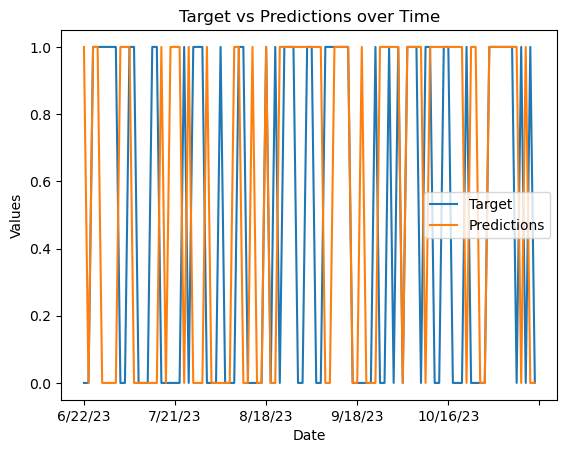

In [11]:
combined = pd.concat([test["Date"], test["Target"], preds], axis=1)
combined.columns = ["Date", "Target", "Predictions"]

combined.set_index("Date", inplace=True)

# Plot the data
combined.plot()
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Target vs Predictions over Time")
plt.show()


In [12]:
# Back testing 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [23]:
#Each trading year has about 250 trading days 
def backtest(data, model, predictors, start=1000, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [24]:
predictions = backtest(df, model, predictors)

In [25]:
#Here we can see that the prediction got slightly better but is still low.
predictions["Predictions"].value_counts()


0.0    1972
1.0     517
Name: Predictions, dtype: int64

In [26]:
precision_score(predictions["Target"], predictions["Predictions"])


0.528046421663443

In [27]:
predictions["Target"].value_counts() / predictions.shape[0]


1    0.513861
0    0.486139
Name: Target, dtype: float64

In [28]:
# Here I will add more predictor to the model (we are going to look at the past 2,5,60 days etc...)
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

/var/folders/nt/56h_3pbn081864nxn7kj0w840000gn/T/ipykernel_86643/1598625203.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_averages = df.rolling(horizon).mean()
/var/folders/nt/56h_3pbn081864nxn7kj0w840000gn/T/ipykernel_86643/1598625203.py:12: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]


In [29]:
df1 = df.dropna(subset=df.columns[df.columns != "Tomorrow"])
df1

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1000,12/23/13,88.000000,88.580002,87.940002,88.309998,76.336990,3242600,88.690002,1,1.004207,2.0,1.021185,4.0,1.084465,33.0,1.220783,136.0,1.625178,519.0
1001,12/24/13,88.339996,88.739998,88.190002,88.690002,76.665482,1042700,89.000000,1,1.002147,2.0,1.014829,5.0,1.086204,34.0,1.223871,137.0,1.630735,520.0
1002,12/26/13,88.900002,89.230003,88.760002,89.000000,76.933441,1745200,89.190002,1,1.001745,2.0,1.011410,5.0,1.087100,34.0,1.225961,138.0,1.635007,520.0
1003,12/27/13,88.820000,89.510002,88.820000,89.190002,77.097710,1797400,89.589996,1,1.001066,2.0,1.007205,5.0,1.086191,35.0,1.226435,138.0,1.637078,520.0
1004,12/30/13,89.190002,89.620003,89.139999,89.589996,77.443474,1769000,90.730003,1,1.002237,2.0,1.007127,5.0,1.087625,36.0,1.229849,138.0,1.642983,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,11/6/23,152.600006,153.070007,151.509995,152.990005,152.990005,2490000,152.979996,0,1.000752,2.0,1.021186,5.0,0.995186,31.0,0.954740,124.0,1.057921,505.0
3485,11/7/23,152.970001,153.789993,152.350006,152.979996,152.979996,1583300,153.009995,1,0.999967,1.0,1.011732,4.0,0.996537,30.0,0.954612,123.0,1.057616,505.0
3486,11/8/23,152.970001,153.800003,152.429993,153.009995,153.009995,1804500,152.369995,0,1.000098,1.0,1.003226,4.0,0.997696,31.0,0.954629,124.0,1.057580,506.0
3487,11/9/23,153.679993,154.160004,152.050003,152.369995,152.369995,2052900,154.380005,1,0.997904,1.0,0.997042,3.0,0.994430,31.0,0.950692,123.0,1.052920,505.0


In [30]:
# Improve model 
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [31]:
predictions = backtest(df1, model, new_predictors)

In [32]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5714285714285714